## 感知机模型

$f(x) = \mathbf{sign}(w^T \cdot x + b)$

## 学习策略

误分类样本点到分类超平面的距离总和最小（不考虑 $\frac{1}{\Vert w\Vert}$）

$L(w,b) = -\sum_{x_i \in M}y_i(w^T \cdot x + b)$

## 原始问题

给定样本 $(x_1,y_1), (x_2, y_2), ..., (x_n, y_n)$, 其中 $y_i \in \{-1, 1\}$, 求解 $w,b$ 使得误分类样本点的函数间隔最小

$\arg min_{w,b} L(w,b) = -\sum_{x_i \in M}y_i(w^T \cdot x + b)$


## 梯度下降求解过程

$\Delta{L_w(w,b)} = -\sum_{x_i \in M} y_i \cdot x_i$

$\Delta{L_b(w,b)} = -\sum_{x_i \in M} y_i$

随机选择一个误分类点

$w \leftarrow w + \gamma \cdot x_i y_i$

$b \leftarrow b + \gamma \cdot y_i$

$\gamma \in (0,1)$

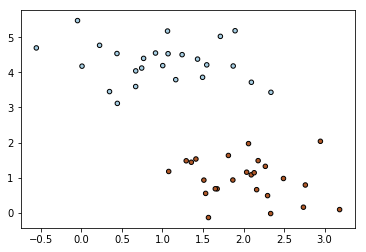

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

[[ 0.66624865]
 [-0.51336141]] [[0.10908281]]


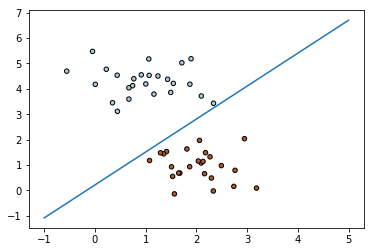

In [85]:
w = np.random.random((2,1))
b = np.random.random((1,1))
MAX_ITER = 1000000
DATA_NUM = len(Y)
gamma = 1e-1
data_iter = 0
classify_success_cnt = 0
Y[Y==0] = -1

while True:
    data_iter = data_iter % DATA_NUM
    x = X[data_iter,:].reshape(2,-1)
    y = Y[data_iter]
    
    f = np.dot(w.reshape(-1,2), x) + b
    if (f > 0 and Y[data_iter] == 1) or (f<0 and Y[data_iter] == -1):
        classify_success_cnt += 1
    else:
        classify_success_cnt = 0
        w += gamma * Y[data_iter] * x
        b += gamma * Y[data_iter]
    
    data_iter += 1
    if classify_success_cnt == DATA_NUM:
        break

print(w,b)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

# plot 决策面
X1 = np.squeeze(np.linspace(-1, 5, 10))
X2 = np.squeeze((-b - w[0] * X1)/w[1])

plt.plot(X1,X2,'-')